In [100]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import statsmodels.api as sm
import sklearn
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [101]:
real_state = pd.read_csv("train.csv")

In [102]:
real_state.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [103]:
real_state.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [104]:
real_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [105]:
real_state = real_state.set_index("Id")

In [106]:
real_state_numeric = real_state.select_dtypes(include=["float64", "int64"])
real_state_numeric

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [107]:
real_state_numeric.drop(['MSSubClass','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                                              'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 
                                              'GarageCars', 'MoSold', 'YrSold', 'FullBath', 'HalfBath', 'Fireplaces', 
                                              'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'], axis=1, inplace=True)

In [108]:
real_state_numeric

,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,,,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
2,80.0,9600,0.0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
3,68.0,11250,162.0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
4,60.0,9550,0.0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
5,84.0,14260,350.0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,0.0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0,175000
1457,85.0,13175,119.0,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0,210000
1458,66.0,9042,0.0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500,266500


In [109]:
real_state_numeric.fillna(0, inplace=True)
real_state_numeric

,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,,,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
2,80.0,9600,0.0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
3,68.0,11250,162.0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
4,60.0,9550,0.0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
5,84.0,14260,350.0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,0.0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0,175000
1457,85.0,13175,119.0,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0,210000
1458,66.0,9042,0.0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500,266500


In [110]:
real_state_numeric.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [111]:
cor = real_state_numeric.corr()

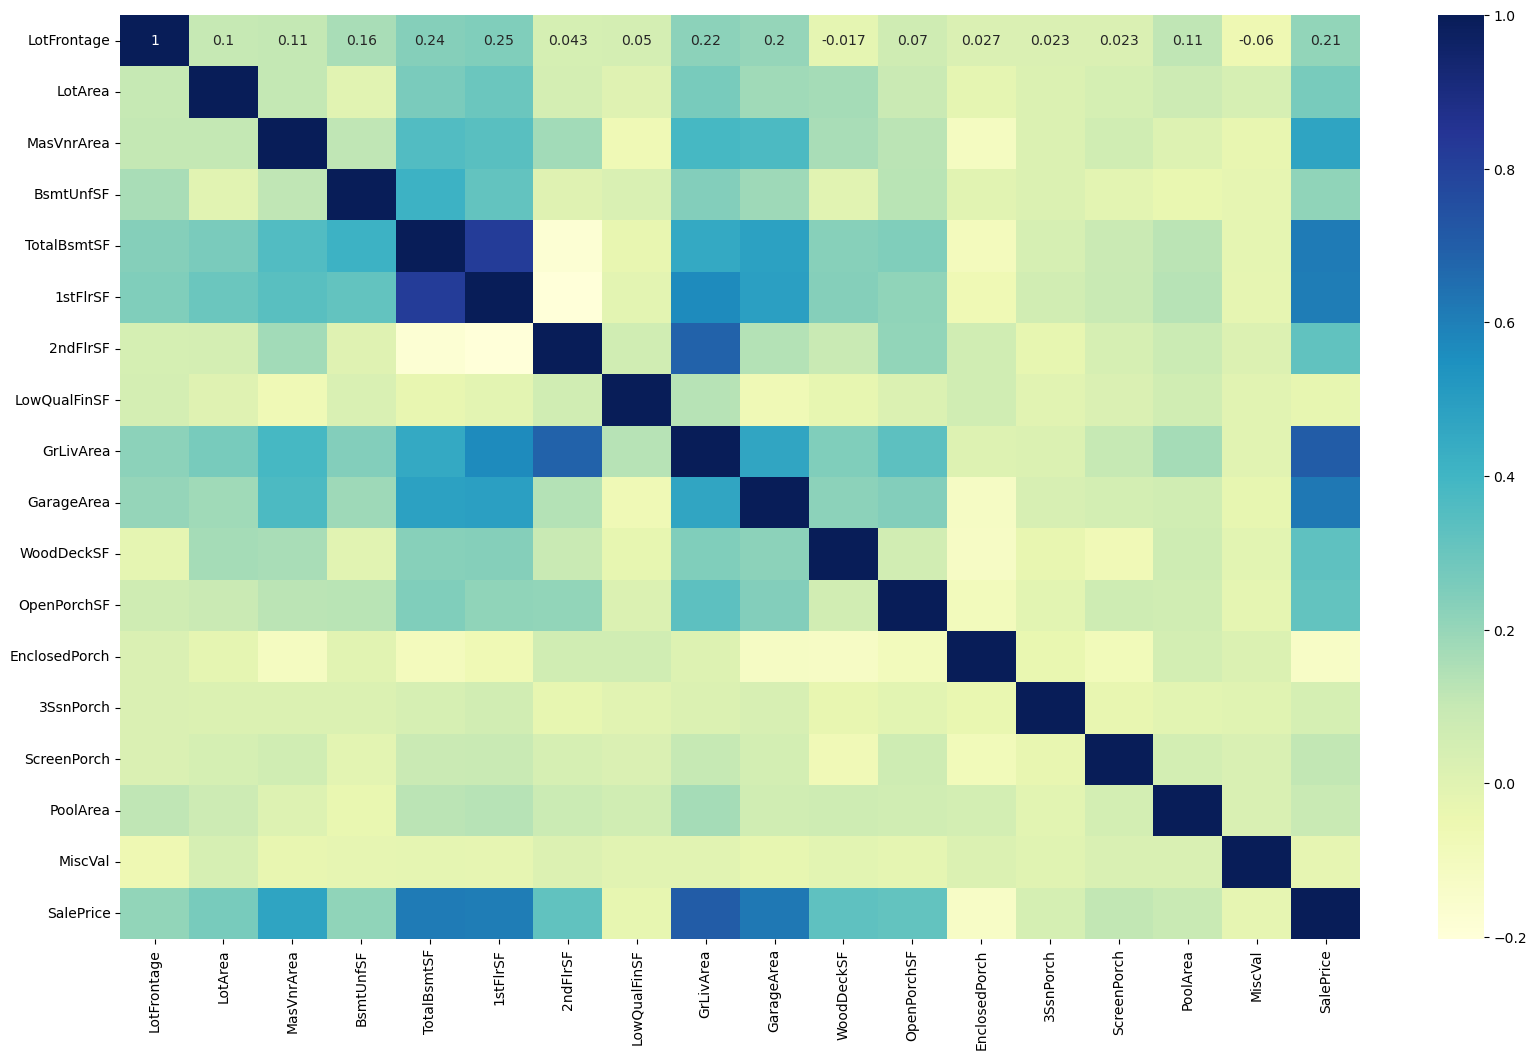

In [112]:
plt.figure(figsize=(20, 12))

sns.heatmap(cor,cmap="YlGnBu" , annot=True)
plt.show()

In [113]:
real_state_categorical_1 = real_state.loc[:, ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                                              'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
                                              'HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 
                                              'GarageYrBlt','GarageCars', 'MoSold', 'YrSold']]
real_state_categorical_1 = real_state_categorical_1.astype("object")
real_state_categorical_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   object
 1   OverallQual   1460 non-null   object
 2   OverallCond   1460 non-null   object
 3   YearBuilt     1460 non-null   object
 4   YearRemodAdd  1460 non-null   object
 5   BsmtFinSF1    1460 non-null   object
 6   BsmtFinSF2    1460 non-null   object
 7   BsmtFullBath  1460 non-null   object
 8   BsmtHalfBath  1460 non-null   object
 9   FullBath      1460 non-null   object
 10  HalfBath      1460 non-null   object
 11  BedroomAbvGr  1460 non-null   object
 12  KitchenAbvGr  1460 non-null   object
 13  TotRmsAbvGrd  1460 non-null   object
 14  Fireplaces    1460 non-null   object
 15  GarageYrBlt   1379 non-null   object
 16  GarageCars    1460 non-null   object
 17  MoSold        1460 non-null   object
 18  YrSold        1460 non-null   object
dtypes: object(1

In [114]:
real_state_categorical_1.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,
1,60,7,5,2003,2003,706,0,1,0,2,1,3,1,8,0,2003.0,2,2,2008
2,20,6,8,1976,1976,978,0,0,1,2,0,3,1,6,1,1976.0,2,5,2007
3,60,7,5,2001,2002,486,0,1,0,2,1,3,1,6,1,2001.0,2,9,2008
4,70,7,5,1915,1970,216,0,1,0,1,0,3,1,7,1,1998.0,3,2,2006
5,60,8,5,2000,2000,655,0,1,0,2,1,4,1,9,1,2000.0,3,12,2008


In [115]:
real_state_categorical_1.isnull().sum()

MSSubClass       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt     81
GarageCars       0
MoSold           0
YrSold           0
dtype: int64

In [116]:
real_state_categorical_1["GarageYrBlt"] = real_state_categorical_1["GarageYrBlt"].astype("Int64")
real_state_categorical_1 = real_state_categorical_1.astype("object")
real_state_categorical_1

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,
1,60,7,5,2003,2003,706,0,1,0,2,1,3,1,8,0,2003,2,2,2008
2,20,6,8,1976,1976,978,0,0,1,2,0,3,1,6,1,1976,2,5,2007
3,60,7,5,2001,2002,486,0,1,0,2,1,3,1,6,1,2001,2,9,2008
4,70,7,5,1915,1970,216,0,1,0,1,0,3,1,7,1,1998,3,2,2006
5,60,8,5,2000,2000,655,0,1,0,2,1,4,1,9,1,2000,3,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,6,5,1999,2000,0,0,0,0,2,1,3,1,7,1,1999,2,8,2007
1457,20,6,6,1978,1988,790,163,1,0,2,0,3,1,7,2,1978,2,2,2010
1458,70,7,9,1941,2006,275,0,0,0,2,0,4,1,9,2,1941,1,5,2010


In [117]:
real_state_categorical_2 = real_state.select_dtypes(include=["object"])
real_state_categorical_2

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal


In [118]:
real_state_categorical_2.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [119]:
real_state_categorical_2.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [120]:
real_state_categorical_1_dummies = pd.get_dummies(~real_state_categorical_1, drop_first=True, dtype=int)
real_state_categorical_1_dummies

,MSSubClass_-181,MSSubClass_-161,MSSubClass_-121,MSSubClass_-91,MSSubClass_-86,MSSubClass_-81,MSSubClass_-76,MSSubClass_-71,MSSubClass_-61,MSSubClass_-51,...,MoSold_-7,MoSold_-6,MoSold_-5,MoSold_-4,MoSold_-3,MoSold_-2,YrSold_-2010,YrSold_-2009,YrSold_-2008,YrSold_-2007
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1458,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [121]:
real_state_categorical_2_dummies = pd.get_dummies(real_state_categorical_2, drop_first=True, dtype=int)
real_state_categorical_2_dummies

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [122]:
real_state_final = real_state_numeric.join([real_state_categorical_1_dummies, real_state_categorical_2_dummies])
real_state_final

,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,150,856,856,854,0,1710,548,...,0,0,0,0,1,0,0,0,1,0
2,80.0,9600,0.0,284,1262,1262,0,0,1262,460,...,0,0,0,0,1,0,0,0,1,0
3,68.0,11250,162.0,434,920,920,866,0,1786,608,...,0,0,0,0,1,0,0,0,1,0
4,60.0,9550,0.0,540,756,961,756,0,1717,642,...,0,0,0,0,1,0,0,0,0,0
5,84.0,14260,350.0,490,1145,1145,1053,0,2198,836,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,0.0,953,953,953,694,0,1647,460,...,0,0,0,0,1,0,0,0,1,0
1457,85.0,13175,119.0,589,1542,2073,0,0,2073,500,...,0,0,0,0,1,0,0,0,1,0
1458,66.0,9042,0.0,877,1152,1188,1152,0,2340,252,...,0,0,0,0,1,0,0,0,1,0


In [123]:
real_state_final.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=1356)

In [124]:
real_state_final["SalePrice"]

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [125]:
df_train, df_test = train_test_split(real_state_final, train_size=0.7, test_size=0.3, random_state=100)

In [127]:
scaler = MinMaxScaler()
cols = df_train.columns
df_train = pd.DataFrame(scaler.fit_transform(df_train))
df_train.columns = cols
df_train

,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.214058,0.019306,0.00000,0.169521,0.141408,0.113889,0.000000,0.000000,0.081860,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.287540,0.039403,0.16000,0.154110,0.220458,0.231481,0.616949,0.000000,0.424289,0.462623,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.166134,0.033981,0.00000,0.274401,0.120295,0.098611,0.333656,0.000000,0.201576,0.155148,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.188498,0.017931,0.00000,0.207620,0.079378,0.145602,0.307022,0.000000,0.230015,0.179831,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.191693,0.046139,0.00000,0.332620,0.127169,0.202315,0.505569,0.000000,0.355880,0.394922,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.191693,0.021158,0.00000,0.431507,0.164975,0.147222,0.000000,0.998058,0.208301,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1017,0.201278,0.031445,0.00000,0.034247,0.119149,0.082407,0.352542,0.000000,0.195619,0.289140,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1018,0.217252,0.228257,0.00000,0.013699,0.301473,0.340278,0.000000,0.000000,0.269792,0.630465,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1019,0.217252,0.029672,0.22625,0.800086,0.305892,0.346528,0.000000,0.000000,0.274981,0.435120,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [128]:
y_train = np.array(df_train["SalePrice"]).reshape(-1, 1)
X_train = df_train.drop(["SalePrice"], axis=1)

In [129]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train)
res = lm.fit()
res.params

const                    0.002004
LotFrontage              0.056838
LotArea                 -0.190236
MasVnrArea               0.038863
BsmtUnfSF               -0.015794
                           ...   
SaleCondition_AdjLand    0.285519
SaleCondition_Alloca    -0.211068
SaleCondition_Family    -0.092211
SaleCondition_Normal     0.015180
SaleCondition_Partial    0.045317
Length: 1356, dtype: float64

In [130]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
y_test = np.array(df_test["SalePrice"]).reshape(-1, 1)
X_test = df_test.drop(["SalePrice"], axis=1)

In [ ]:
X_test = pd.DataFrame(scaler.transform(X_test))

In [ ]:
y_pred = lr.predict(X_test_sc)

In [ ]:
print(lr.intercept_)
print(lr.coef_)

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

In [ ]:
rss = r
mse = mean_squared_error(y_test, y_pred)
